In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')


[]

Remove dodgy **images**

In [7]:
import cv2
import imghdr

In [8]:
data_dir = 'data'


In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [10]:
# from google.colab import files
# import shutil

# # # تحميل الملفات
# uploaded = files.upload()

# # إنشاء مجلد وتحريكه
# folder_name = "sad"  # اسم المجلد الذي تريد إنشاؤه
# !mkdir {folder_name}

# # نقل الملفات إلى المجلد الجديد
# for file_name in uploaded.keys():
#     shutil.move(file_name, f"{folder_name}/{file_name}")

# print(f"تم رفع الملفات بنجاح إلى المجلد {folder_name}!")


In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/happy/.ipynb_checkpoints


Load Data


In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 304 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

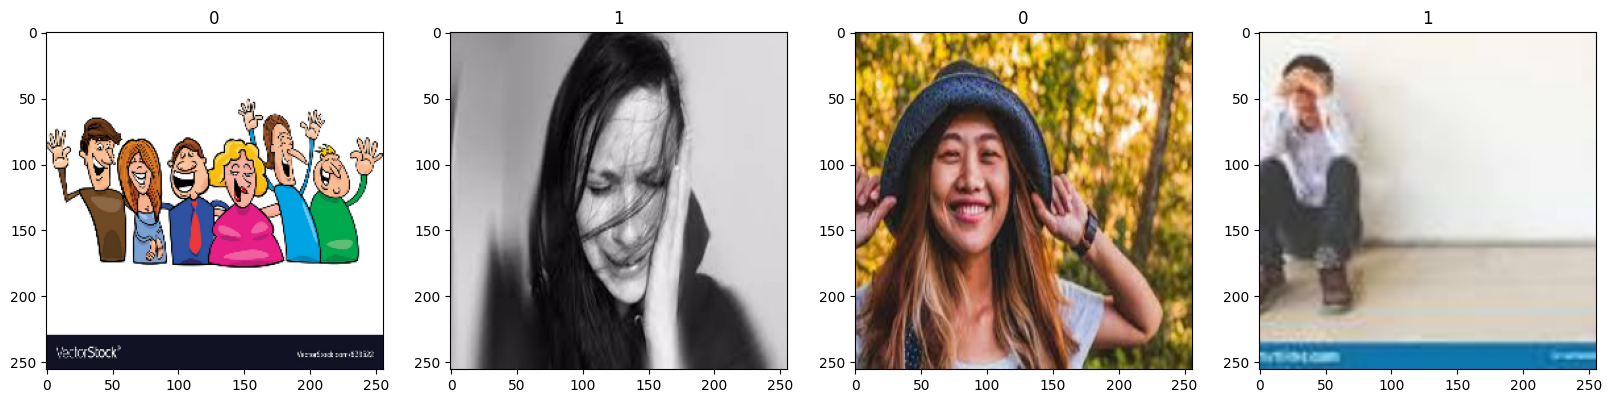

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))


Split Data

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

7

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [25]:

# أول Conv2D Layer مع Dropout
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# ثاني Conv2D Layer مع Dropout
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# ثالث Conv2D Layer مع Dropout
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer مع Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Compiler
# optimizer = Adam(learning_rate=0.0001)
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [27]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train

In [28]:
logdir='logs'


In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [30]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.4785 - loss: 2.2021 - val_accuracy: 0.5625 - val_loss: 0.7089
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.4771 - loss: 1.0591 - val_accuracy: 0.5312 - val_loss: 0.6913
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4617 - loss: 0.7065 - val_accuracy: 0.5312 - val_loss: 0.6932
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5547 - loss: 0.6816 - val_accuracy: 0.6406 - val_loss: 0.6878
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4676 - loss: 0.6904 - val_accuracy: 0.5312 - val_loss: 0.6920
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4846 - loss: 0.6683 - val_accuracy: 0.8281 - val_loss: 0.6610
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5494 - loss: 0.6488 - val_accuracy: 0.7969 - val_loss: 0.6512
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6328 - loss: 0.6306 - val_accuracy: 0.7188 - val_loss: 0.6569
Epoch 9/

# Plot Performance

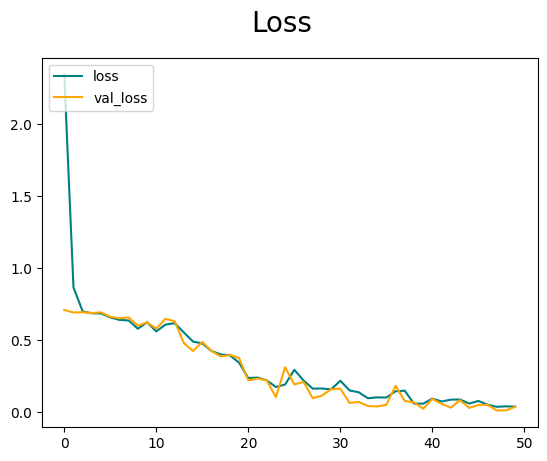

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

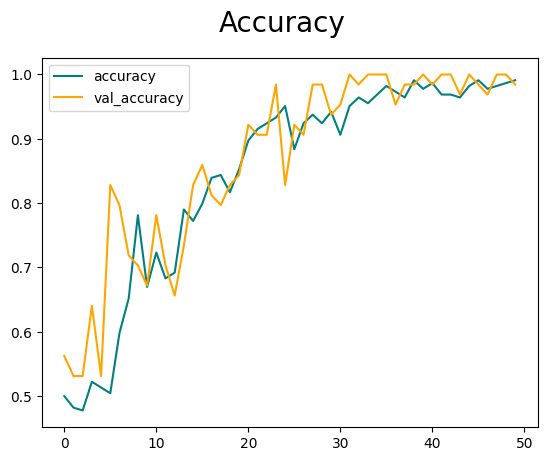

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch  #il
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


In [36]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.8888889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9375, shape=(), dtype=float32)


# Test

In [37]:
import cv2
import matplotlib.pyplot as plt



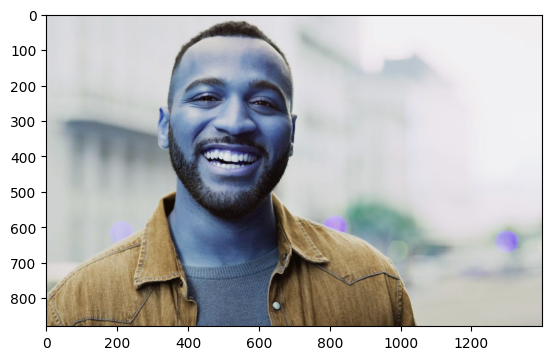

In [38]:
img = cv2.imread('00.jpg')
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

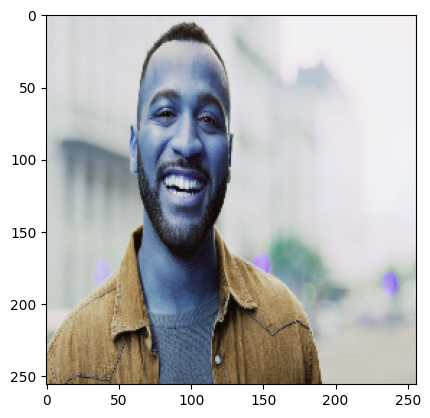

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [41]:
yhat

array([[0.1439192]], dtype=float32)

In [42]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [43]:
model.save("E:/model.h5")  # قم بتحديد المسار الذي ترغب فيه


In [44]:
import os
print(os.path.exists("E:/model.h5"))


True


In [45]:
!pip install pyngrok


In [47]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# تحميل النموذج
MODEL_PATH = "E:/model.h5"  # ضع مسار النموذج الخاص بك هنا
model = load_model(MODEL_PATH)

# دالة لتصنيف الصورة
def classify_image(uploaded_image):
    try:
        img = uploaded_image.resize((150, 150))  # تغيير الحجم ليناسب النموذج
        img_array = np.array(img) / 255.0       # تطبيع الصورة
        img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد جديد
        predictions = model.predict(img_array)        # تنبؤ النموذج
        predicted_class = np.argmax(predictions, axis=-1)
        return predicted_class[0]
    except Exception as e:
        return f"Error: {e}"

# واجهة المستخدم
st.title("Image Classifier")
st.write("قم برفع صورة للتصنيف.")

# تحميل الصورة من المستخدم
uploaded_file = st.file_uploader("اختر صورة", type=['jpeg','jpg', 'bmp', 'png'])

if uploaded_file is not None:
    image = Image.open(uploaded_file)  # فتح الصورة باستخدام PIL
    st.image(image, caption="الصورة التي تم رفعها", use_column_width=True)
    st.write("جاري تصنيف الصورة...")

    # تصنيف الصورة
    result = classify_image(image)
    st.write(f"التصنيف: {result}")


Overwriting app.py


In [51]:
from pyngrok import ngrok

# تشغيل Streamlit
!streamlit run app.py &

# فتح رابط باستخدام ngrok
public_url = ngrok.connect(port="8501")
print(f"يمكنك الوصول إلى التطبيق هنا: {public_url}")


In [ ]:
from google.colab import files
uploaded = files.upload()
